## **Importing Necessary Tools**

In [894]:
#Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

## **Reading our Dataset**

After we have found our Dataset, we uploaded it as a file to our notbook

In [895]:
#Reading the file(dataset) we imported and assigning it to a variable
df = pd.read_csv('Air_Quality.csv')

In [896]:
#checking for missing values to see which columns and rows would need to be dropped
df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [897]:
#dropping unnecessary columns and rows 
df.drop(columns = ['Geo Join ID'], inplace = True)
df.drop(columns = ['Message'], inplace = True)

In [898]:
#df['Geo Place Name'] = df['Geo Place Name'].dropna()
df = df.dropna(subset=['Geo Place Name'])

In [899]:
#checking how many rows had missing values after dropping the rows
df['Geo Place Name'].isnull().sum()

np.int64(0)

In [900]:
#checking the missing values in the dataframe
df.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

## Dropping the columns that were useless or unnecessary


In [901]:
df.drop(['Unique ID', 'Indicator ID'], axis = 1, inplace=True)df.drop(['Unique ID', 'Indicator ID'], axis = 1, inplace=True)df.drop(['Unique ID', 'Indicator ID'], axis = 1, inplace=True)df.drop(['Unique ID', 'Indicator ID'], axis = 1, inplace=True)

In [902]:

df.drop(columns=['Geo Type Name'], inplace=True) 

## **Looking at our final values after everything we didn't need in our project was dropped**

In [903]:
df.head()df.head()df.head()df.head()

,Name,Measure,Measure Info,Geo Place Name,Time Period,Start_Date,Data Value
0,Boiler Emissions- Total SO2 Emissions,Number per km2,number,Southeast Queens,2015,01/01/2015,0.3
1,Ozone (O3),Mean,ppb,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9
2,Ozone (O3),Mean,ppb,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7
3,Ozone (O3),Mean,ppb,East New York,Summer 2014,06/01/2014,32.0
4,Ozone (O3),Mean,ppb,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9


In [904]:
df.columnsdf.columnsdf.columnsdf.columns

Index(['Name', 'Measure', 'Measure Info', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value'],
      dtype='object')

## **We are starting to look at what possible relationships we can find**
At first we were looking a the relationship between the columns **'Name'** and **'Data Value'**, however we then realised that this would not give us as much insight into the trends of the dataset, as if we would plot **two correlating graphs**.
 



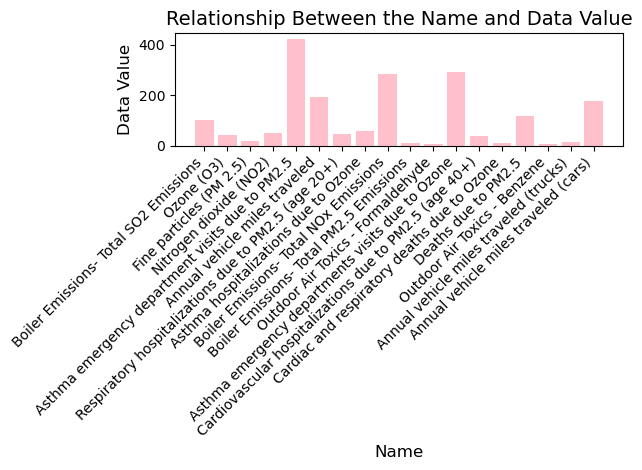

In [905]:
#using the bar chart we dispayed the columns 'Name' and 'Data Value'
plt.bar(df["Name"], df["Data Value"], color="pink")

#we labeled our axis and graph to make it more presentable 
plt.xlabel("Name", fontsize=12)
plt.ylabel("Data Value", fontsize=12)

#we tilted the name 
plt.title("Relationship Between the Name and Data Value", fontsize=14)

#We use plt.xticks to adjust the appearance of the x axis 
#on our plot so that the names would not overlap or look messy
plt.xticks(rotation=45, ha="right")

#plt.tight_layout ensures that the labels dont overlap, and in general for the plot to not get disorganised
plt.tight_layout()
plt.show()

## **Plotting two graphs that correclate with each other**

**chosen columns(variables): "Geo Place Name", "Name", "Data Value"**

**Geo place name**: 
The Geographical location of where the data was recorded

**Name**: The name of the factor that was measured

**Data value**: The recorded data

**We made two graphs that would correlate to eachother to check patterns between 3 columns (variables)in the dataset**

The **first graph**, shows the relationship between **Geo place Name** and **Data Value**. What it shows is the recorded data, in that specific location.

The **second graph** shows the relationship between **Name** and **Data values**. It shows what factor the data collected refers to.

## **If we put these 2 graphs together, we can see what factor was taken in what location, and what was the data collected and measured there** 

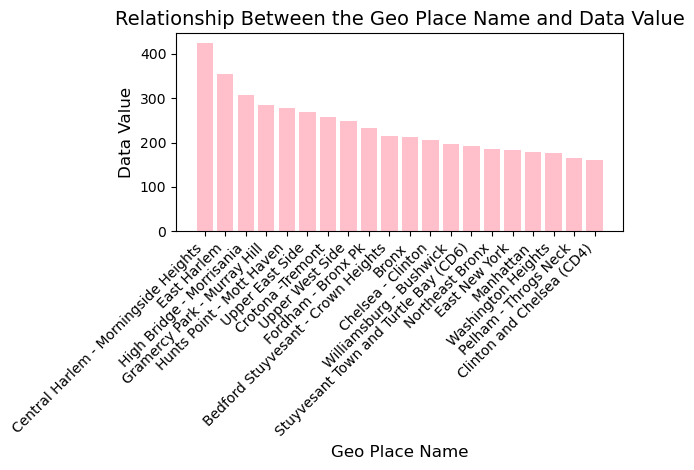

In [906]:
#Since we have about 18000 locations, we cannot possibly use them all at once, since then 
#they will ovelap and be unreadable. So we took the top 100 largest Data values, and then took the locations
#corresponding to them
top_locations = df.nlargest(100, "Data Value")

#We plotted the relatioship between Geo place name and data values in a histogram
plt.bar(top_locations["Geo Place Name"], top_locations["Data Value"], color="pink")

#We added labels and a title to the plot to make it understandable
plt.xlabel("Geo Place Name", fontsize=12)
plt.ylabel("Data Value", fontsize=12)
plt.title("Relationship Between the Geo Place Name and Data Value", fontsize=14)

#And again xticks and tight_layout to make sure nothing overlaps and the plot is nice and tidy
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

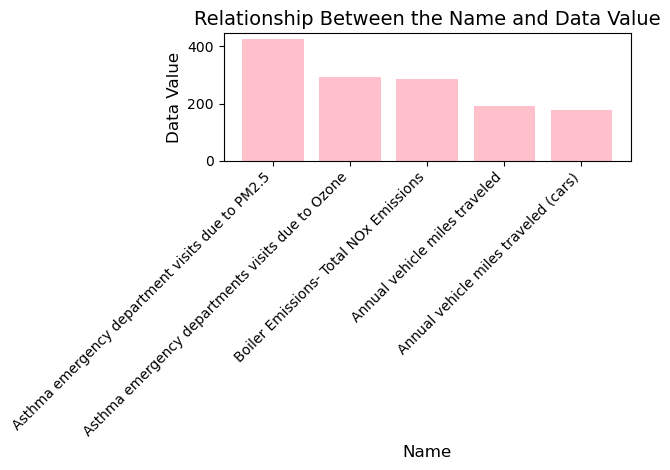

In [907]:
#The same idea of plotting a histogram, but with the relatioship between Name and Data values
plt.bar(top_locations["Name"], top_locations["Data Value"], color="pink")

#adding labels and a title to be understandable
plt.xlabel("Name", fontsize=12)
plt.ylabel("Data Value", fontsize=12)
plt.title("Relationship Between the Name and Data Value", fontsize=14)

#and using xticks and tight_layout for the plot to be tidy
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Data Strategy Updates:**

**For predictions we will use
‘Name’ column of our data set:**

We will be using this column, because it specifies the type of factor that is being measured, which we will then use to see how to improve it.


**Measure column of our dataset:**

We need this column to that we can see what units the factor is being measured in


**‘Data Value’ column of our data set:**

It shows the measured value of a specific type of factor we are trying to improve. 


**Geo place Name column:**
 
We need it because it is also a factor that heavily contributes to Air quality, since the climate and conditions can be very different from place to place.
